In [1]:
import cv2
import numpy as np

In [2]:
def BGR2HSV(img_original):
    img = img_original.copy() / 255.
    b,g,r = img[:,:,0], img[:,:,1], img[:,:,2]
    hsv = np.zeros_like(img)
    max_v = np.max(img, axis=2).copy()
    #print(max_v)
    min_v = np.min(img, axis=2).copy()
    min_arg = np.argmin(img, axis=2)

    # H
    hsv[..., 0][np.where(max_v == min_v)]= 0
    ## if min == B
    ind = np.where(min_arg == 0)
    hsv[..., 0][ind] = 60 * (img[..., 1][ind] - img[..., 2][ind]) / (max_v[ind] - min_v[ind]) + 60
    ## if min == R
    ind = np.where(min_arg == 2)
    hsv[..., 0][ind] = 60 * (img[..., 0][ind] - img[..., 1][ind]) / (max_v[ind] - min_v[ind]) + 180
    ## if min == G
    ind = np.where(min_arg == 1)
    hsv[..., 0][ind] = 60 * (img[..., 2][ind] - img[..., 0][ind]) / (max_v[ind] - min_v[ind]) + 300
    # S
    hsv[..., 1] = max_v.copy() - min_v.copy()
    # V
    hsv[..., 2] = max_v.copy()
    return hsv

In [3]:
def HSV2BGR(_img, hsv):
    img = _img.copy() / 255.

    # get max and min
    max_v = np.max(img, axis=2).copy()
    min_v = np.min(img, axis=2).copy()

    out = np.zeros_like(img)

    H = hsv[..., 0]
    S = hsv[..., 1]
    V = hsv[..., 2]

    C = S
    H_ = H / 60.
    X = C * (1 - np.abs( H_ % 2 - 1))
    Z = np.zeros_like(H)

    vals = [[Z,X,C], [Z,C,X], [X,C,Z], [C,X,Z], [C,Z,X], [X,Z,C]]

    for i in range(6):
        ind = np.where((i <= H_) & (H_ < (i+1)))
        out[..., 0][ind] = (V - C)[ind] + vals[i][0][ind]
        out[..., 1][ind] = (V - C)[ind] + vals[i][1][ind]
        out[..., 2][ind] = (V - C)[ind] + vals[i][2][ind]

    out[np.where(max_v == min_v)] = 0
    out = np.clip(out, 0, 1)
    out = (out * 255).astype(np.uint8)

    return out

In [4]:
img = cv2.imread(r'D:\Program Files (x86)\ImageProcessing100Wen-master\ImageProcessing100Wen-master\assets\imori.jpg')
cv2.imshow('1',img)
cv2.waitKey(0)
cv2.destroyAllWindows()

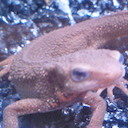

In [5]:
#BGE->HSV
hsv = BGR2HSV(img)

# Transpose Hue
hsv[..., 0] = (hsv[..., 0] + 180) % 360

# HSV > RGB
out = HSV2BGR(img, hsv)

# Save result
cv2.imshow("result", out)
cv2.waitKey(0)
cv2.destroyAllWindows()

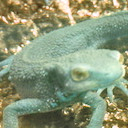